<div style="font-family: Arial, Helvetica, sans-serif;">
        <div style="font-weight:600; text-align: center; padding-top: 20px;">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN, ĐHQG-HCM
        </div>
        <div style="font-weight:600; text-align: center; padding-top: 20px;">KHOA CÔNG NGHỆ THÔNG TIN
        </div>
        <div style="font-size: 26px ;font-weight: 700; text-align: center;padding-top: 20px;">ĐỒ ÁN THỰC HÀNH
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Môn học: </div>
            <div>Nhập môn khoa học dữ liệu</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Lớp: </div>
            <div>20_21</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Chủ đề: </div>
            <div>Thời tiết</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">Nhóm: </div>
            <div>09</div>
        </div>
        <div>
            <h1>Thành viên trong nhóm</h1>
            <table style="font-size: 18px; display:flex;" >
                <tr>
                    <th>STT</th>
                    <th>MSSV</th>
                    <th>Họ và tên</th>
                </tr>
                <tr>
                    <td>1</td>
                    <td>20120109</td>
                    <td style="text-align:left;">Trương Ngọc Huy</td>
                </tr>
                <tr>
                    <td>2</td>
                    <td>20120125</td>
                    <td style="text-align:left;">Bùi Anh Kiệt</td>
                </tr>
                <tr>
                    <td>3</td>
                    <td>20120598</td>
                    <td style="text-align:left;">Dương Tấn Tồn</td>
                </tr>
                <tr>
                    <td>4</td>
                    <td>20120614</td>
                    <td style="text-align:left;">Nguyễn Anh Tuấn</td>
                </tr>
            </table>
        </div>
</div>

Trước hết, import tất cả các thư viện cần thiết cho toàn bộ đồ án.

In [1]:
import numpy as np
import pandas as pd

import requests

import datetime as dt
from datetime import datetime, date, timedelta

import json
import csv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# PHẦN 1: QUY TRÌNH KHOA HỌC DỮ LIỆU

# A. Thu thập dữ liệu

 <div>
    <div style="font-weight: 600; padding-right: 10px; font-size:24px;padding-bottom:10px; ">1. Lý do chọn chủ đề và tập dữ liệu: </div>
    <div style="padding-left: 10px; ">
        <li>Chủ đề thời tiết luôn nhận được sự quan tâm của tất cả mọi người.Bởi lẽ, đây là một chủ đề quen thuộc, thực tiễn và thiết yếu. Do đó, nhóm đã chọn chủ đề này với mục đích tìm hiểu thêm về thời tiết tại khu vực đang sống (cụ thể là quận Tân Bình, thành phố Hồ Chí Minh).</li>
        <li>Quá trình thực hiện đồ án với chủ đề này đảm bảo sự thành công nhất định ở kết quả thu được trong từng giai đoạn của quy trình khoa học dữ liệu. Đồng thời, khi tìm hiểu về chủ đề này, nhóm còn biết được thêm nhiều về các thông tin thời tiết.</li>
        <li>Bên cạnh đó, việc tìm kiếm tập dữ liệu cho chủ đề này là không quá khó vì nó có sẵn, đa dạng, phổ biến và được cung cấp miễn phí ở nhiều website.</li>
    </div>
</div>

<div>
    <div style="font-weight: 600; padding-right: 10px; font-size:24px;padding-bottom:10px; ">2. Thông tin tập dữ liệu: </div>
    <div style="display: flex; padding: 10px 0;">
        <div style="font-weight: 600; padding-right: 10px;">Nguồn gốc: </div>
        <a href="https://www.wunderground.com/history/monthly/vn/tan-binh/VVTS/date/2020-1">tại đây</a>
    </div>
    <div style="display: flex;">
        <div style="font-weight: 600; padding-right: 10px;">Phương pháp thu thập: </div>
        <div>Tập dữ liệu được được tổng hợp từ API của website với các thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:</div>
    </div>
    <div style="padding-left:20px;">
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">key: </div>
            <div>Key của object</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">class: </div>
            <div>Lớp đối tượng</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">expire_time_gmt: </div>
            <div>Thời điểm mà dữ liệu được cập nhật vào tập dữ liệu</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">obs_id: </div>
            <div>id của object</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">obs_name: </div>
            <div>name của class</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">valid_time_gmt: </div>
            <div>Thời gian mà dữ liệu được thu thập</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">day_ind: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">temp: </div>
            <div>Nhiệt độ</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wx_icon: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">icon_extd: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wx_phrase: </div>
            <div>Tình trạng</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">pressure_tend: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">pressure_desc: </div>
            <div>Áp suất</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">dewPt: </div>
            <div>Điểm sương</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">heat_index: </div>
            <div>Chỉ số nhiệt</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">rh: </div>
            <div>Độ ẩm</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">pressure: </div>
            <div>Sức ép</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">vis: </div>
            <div>Sức gió</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wc: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wdir: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wdir_cardinal: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">gust: </div>
            <div>Gió giật</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">wspd: </div>
            <div>Tốc độ gió</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">max_temp: </div>
            <div>Nhiệt độ cao nhất</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">min_temp: </div>
            <div>Nhiệt độ thấp nhất</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">precip_total: </div>
            <div>Tổng lượng mưa</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">precip_hrly: </div>
            <div>Lượng mưa hàng giờ</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">snow_hrly: </div>
            <div>Tuyết hàng giờ</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">uv_desc: </div>
            <div>Mô tả uv</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">feels_like: </div>
            <div>Cảm giác nhiệt độ như</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">uv_index: </div>
            <div>Chỉ số UV</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">qualifier: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">qualifier_svrty: </div>
            <div>Vòng loại</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">blunt_phrase: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">terse_phrase: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">clds: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">water_temp: </div>
            <div>Nhiệt độ nước</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">primary_wave_period: </div>
            <div>Thủy triều</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">primary_wave_height: </div>
            <div>Chiều cao sóng</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">primary_swell_period: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">primary_swell_height: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">primary_swell_direction: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">secondary_swell_period: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">secondary_swell_height: </div>
            <div>Không liên quan</div>
        </div>
        <div style="display: flex;">
            <div style="font-weight: 600; padding-right: 10px;">secondary_swell_direction: </div>
            <div>Không liên quan</div>
        </div>
    </div>
</div>

Bắt đầu tiến hành lấy dữ liệu theo ngày trong năm 2021 từ website bằng API và ghi vào tập tin `weather-2021.csv`.

In [2]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def getDataByDate(location,startDate,endDate):
    units = "e" 
    apiKey = "e1f10a1e78da46f5b10a1e78da96f525"
    
    api = "https://api.weather.com/v1/location/"+location+"/observations/historical.json?apiKey="+apiKey+"&units="+units+"&startDate="+startDate+"&endDate="+endDate
    x = requests.get(api)
    
    return x.json()["observations"]

location = "VVTS:9:VN" # địa chỉ
startYear = 2021 # năm bắt đầu
endYear = 2021 # năm kết thúc

# Lấy từ năm bắt đầu đến hiện tại
for year in range(startYear, endYear + 1):
    f = open('./weather-' + str(year) +'.csv', 'w',encoding='UTF8', newline='')
    writer = csv.writer(f)
    header=False
    data = []
    for single_date in daterange(date(year, 1, 1), date(year, 12, 31)):
        observations = getDataByDate(location,str(single_date.strftime("%Y%m%d")), str(single_date.strftime("%Y%m%d")))    
        if not header:
            header = observations[0].keys()
            writer.writerow(header)  
        for cell in observations:
            writer.writerow(cell.values())
        print(single_date,len(observations))
    f.close()

2021-01-01 47
2021-01-02 48
2021-01-03 48
2021-01-04 48
2021-01-05 48
2021-01-06 48
2021-01-07 48
2021-01-08 48
2021-01-09 48
2021-01-10 48
2021-01-11 48
2021-01-12 48
2021-01-13 48
2021-01-14 48
2021-01-15 48
2021-01-16 24
2021-01-17 48
2021-01-18 48
2021-01-19 48
2021-01-20 48
2021-01-21 48
2021-01-22 48
2021-01-23 48
2021-01-24 48
2021-01-25 48
2021-01-26 48
2021-01-27 48
2021-01-28 47
2021-01-29 48
2021-01-30 48
2021-01-31 48
2021-02-01 48
2021-02-02 48
2021-02-03 48
2021-02-04 48
2021-02-05 48
2021-02-06 48
2021-02-07 48
2021-02-08 48
2021-02-09 48
2021-02-10 48
2021-02-11 48
2021-02-12 48
2021-02-13 41
2021-02-14 48
2021-02-15 48
2021-02-16 48
2021-02-17 48
2021-02-18 48
2021-02-19 48
2021-02-20 48
2021-02-21 48
2021-02-22 48
2021-02-23 48
2021-02-24 48
2021-02-25 48
2021-02-26 48
2021-02-27 46
2021-02-28 48
2021-03-01 44
2021-03-02 48
2021-03-03 48
2021-03-04 48
2021-03-05 48
2021-03-06 48
2021-03-07 48
2021-03-08 48
2021-03-09 48
2021-03-10 48
2021-03-11 48
2021-03-12 48
2021-0

Sau khi thu thập dữ liệu và cấu trúc hóa thành một bảng lưu trong tập tin `weather-2021.csv`, kiểm tra tập dữ liệu có thỏa mãn với yêu cầu của đồ án (ít nhất 5 thuộc tính và 1000 dòng) hay không?

In [3]:
def assertData():
    df = pd.read_csv('./weather-2021.csv')
    try:
        assert len(df.index) >= 1000
    except:
        print("Tập dữ liệu không đủ 1000 dòng")

    try:
        assert len(df.columns) >= 5
    except:
        print("Tập dữ liệu không đủ 5 thuộc tính")
    
    print("Tập dữ liệu thõa mãn yêu cầu đồ án!")

assertData()

Tập dữ liệu thõa mãn yêu cầu đồ án!


# B. Khám phá dữ liệu

## 1. Đọc dữ liệu, tính số dòng và số cột

Đọc dữ liệu từ tập tin `weather-2021.csv` và in ra 5 dòng đầu tiên.

In [4]:
df = pd.read_csv('weather-2021.csv')
df.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,VVTS,observation,1609441200,VVTS,Ho Chi Minh City,1609434000,N,75,29,2900,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VVTS,observation,1609443000,VVTS,Ho Chi Minh City,1609435800,N,75,29,2900,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VVTS,observation,1609444800,VVTS,Ho Chi Minh City,1609437600,N,75,29,2900,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VVTS,observation,1609446600,VVTS,Ho Chi Minh City,1609439400,N,73,29,2900,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VVTS,observation,1609448400,VVTS,Ho Chi Minh City,1609441200,N,73,29,2900,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tính số dòng, số cột và lưu vào 2 biến `num_rows` và `num_cols`

In [5]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 17390
Number of columns: 45


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu là thông tin và các chỉ số về thời tiết của quận Tân Bình, thành phố Hồ Chí Minh tại thời điểm nhất định (cập nhật 30 phút/lần). Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức không có dòng nào bị 'lạc loài'.

## 3. Dữ liệu có các dòng bị lặp không?

Kiểm tra có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.

In [6]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp. 

## 4. Tỉ lệ giá trị thiếu của từng cột

Tính tỉ lệ giá trị thiếu của từng cột. Đầu tiên, dùng `isnull()` để biết được các giá trị thiếu, sau đó dùng `sum()` để tính tổng số giá trị thiếu theo từng cột. Cuối cùng, chia cho tổng số dòng để tính tỉ lệ giá trị thiếu của mỗi cột và lưu kết quả vào biến `missing_ratio`.

In [7]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

key                          0.000000
class                        0.000000
expire_time_gmt              0.000000
obs_id                       0.000000
obs_name                     0.000000
valid_time_gmt               0.000000
day_ind                      0.000000
temp                         0.000000
wx_icon                      0.000000
icon_extd                    0.000000
wx_phrase                    0.000000
pressure_tend                1.000000
pressure_desc                1.000000
dewPt                        0.000115
heat_index                   0.000115
rh                           0.000115
pressure                     0.000575
vis                          0.000000
wc                           0.000000
wdir                         0.255952
wdir_cardinal                0.000000
gust                         0.994767
wspd                         0.000000
max_temp                     1.000000
min_temp                     1.000000
precip_total                 1.000000
precip_hrly 

Có thể thấy, có những cột mà tỉ lệ giá trị thiếu lên đến hơn 99% hoặc thậm chí là 100%

### Loại bỏ một số cột không cần thiết

Có thể thấy, có rất nhiều cột không có giá trị (hay tỉ lệ dữ liệu bị thiếu xấp xỉ 100%). Để làm gọn dữ liệu và để dễ quản lý dataframe hơn, ta sẽ bỏ đi những cột không có ý nghĩa đó.

In [8]:
del_cols = []
for i in range(len(missing_ratio)):
    if missing_ratio[i] > 0.9:
        del_cols.append(missing_ratio.index[i])
df = df.drop(del_cols, axis=1)
df.columns

Index(['key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name',
       'valid_time_gmt', 'day_ind', 'temp', 'wx_icon', 'icon_extd',
       'wx_phrase', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wc',
       'wdir', 'wdir_cardinal', 'wspd', 'uv_desc', 'feels_like', 'uv_index',
       'clds'],
      dtype='object')

Sau khi bỏ đi những cột có tỉ lệ thiếu cao, tiến hành điền vào những giá trị thiếu còn lại bằng giá trị trung bình của mỗi cột tương ứng với từng điều kiện thời tiết. Việc làm này sẽ có lợi cho quá trình mô hình hóa dữ liệu sau này.

Lấy tên những cột có giá trị thiếu và lưu vào `missing_cols`.

In [9]:
missing_cols = df.columns[df.isnull().any()]

Tính giá trị trung bình của mỗi cột trong `df` theo các giá trị trong `wx_phrase` (điều kiện thời tiết).

In [10]:
mean = df.groupby('wx_phrase').mean()
mean

,expire_time_gmt,valid_time_gmt,temp,wx_icon,icon_extd,dewPt,heat_index,rh,pressure,vis,wc,wdir,wspd,feels_like,uv_index
wx_phrase,,,,,,,,,,,,,,,
Cloudy,1.631486e+09,1.631479e+09,79.962963,26.000000,2600.000000,73.814815,83.907407,82.222222,29.765000,5.111111,79.962963,216.190476,5.481481,83.907407,1.500000
Fair,1.619870e+09,1.619863e+09,82.007961,33.479486,3347.948561,71.213411,86.613595,71.656767,29.795993,5.625842,82.007961,158.130277,6.134415,86.613595,1.859767
Fog,1.625648e+09,1.625640e+09,77.925926,20.000000,2000.000000,75.209877,80.407407,92.123457,29.814444,1.554691,77.925926,230.000000,2.135802,80.407407,0.777778
Haze,1.615808e+09,1.615801e+09,84.750000,21.000000,2100.000000,67.625000,86.625000,58.875000,29.805000,1.991250,84.750000,260.000000,4.625000,86.625000,7.000000
Heavy Rain Shower,1.630871e+09,1.630864e+09,78.444444,40.000000,1102.000000,77.000000,82.222222,95.555556,29.733333,1.472222,78.444444,257.142857,12.000000,82.222222,3.666667
Heavy Rain Shower / Windy,1.627074e+09,1.627067e+09,76.000000,40.000000,1192.000000,75.000000,76.500000,97.000000,29.685000,1.000000,76.000000,295.000000,25.500000,76.500000,5.000000
Heavy T-Storm,1.626596e+09,1.626589e+09,76.571429,4.000000,402.000000,75.250000,78.678571,95.964286,29.734286,1.232500,76.571429,200.370370,11.535714,78.678571,1.357143
Heavy T-Storm / Windy,1.625373e+09,1.625366e+09,74.000000,4.000000,492.000000,73.666667,74.166667,99.000000,29.715000,0.640000,74.000000,236.666667,24.500000,74.166667,2.666667
Light Rain,1.629199e+09,1.629191e+09,78.528713,11.000000,1201.000000,76.835644,82.007921,94.938614,29.730297,4.544554,78.528713,216.178161,4.712871,82.007921,0.657426


Điền vào các giá trị thiếu giá trị trung bình của mỗi cột ứng với mỗi giá trị trong cột `wx_phrase` (điều kiện thời tiết).

In [11]:
for col in missing_cols:
    df[col] = df[col].fillna(df['wx_phrase'].map(mean[col]))

Xem số giá trị thiếu trong các cột.

In [12]:
df.isnull().sum()

key                0
class              0
expire_time_gmt    0
obs_id             0
obs_name           0
valid_time_gmt     0
day_ind            0
temp               0
wx_icon            0
icon_extd          0
wx_phrase          0
dewPt              0
heat_index         0
rh                 0
pressure           0
vis                0
wc                 0
wdir               0
wdir_cardinal      0
wspd               0
uv_desc            0
feels_like         0
uv_index           0
clds               0
dtype: int64

Như vậy, tập dữ liệu không còn giá trị thiếu.

## 5. Mỗi cột có ý nghĩa gì?

Dựa trên thông tin tập dữ liệu đã mô tả ở phần Thu thập dữ liệu, ta chọn ra những cột liên quan và cần thiết:
- Thời điểm biểu diễn các chỉ số thời tiết: 'valid_time_gmt'.
- Thông tin về chỉ số thời tiết: 'temp', 'wx_phrase', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wspd', 'uv_desc', 'feels_like', 'uv_index'.

Như vậy các cột bị loại bỏ bao gồm: 'key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name', 'day_ind', 'wx_icon', 'icon_extd', 'wc', 'wdir', 'wdir_cardinal', 'clds'.

### Loại bỏ một số cột không cần thiết

In [13]:
del_cols = ['key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name', 'day_ind', 'wx_icon', 'icon_extd', 'wc', 'wdir', 'wdir_cardinal', 'clds']
df = df.drop(del_cols, axis=1)
df.columns

Index(['valid_time_gmt', 'temp', 'wx_phrase', 'dewPt', 'heat_index', 'rh',
       'pressure', 'vis', 'wspd', 'uv_desc', 'feels_like', 'uv_index'],
      dtype='object')

Để dễ dàng ghi nhớ ý nghĩa của từng cột, ta tiến hành thay đổi tên cột bằng phương thức `rename()`.

In [14]:
df.rename(columns = {'valid_time_gmt':'Time',
                     'temp':'Temperature',
                     'wx_phrase':'Condition',
                     'dewPt':'Dew Point',
                     'heat_index':'Heat Index',
                     'rh':'Humidity',
                     'pressure':'Pressure',
                     'vis':'Wind Force',
                     'wspd':'Wind Speed',
                     'uv_desc':'UV Description',
                     'feels_like':'Temperature Feels Like',
                     'uv_index':'UV Index'}, inplace = True)
# Sắp xếp lại thứ tự các cột
df = df[['Time',
         'Temperature', 'Heat Index', 'Temperature Feels Like',
         'Dew Point', 'Humidity',
         'Wind Force', 'Wind Speed',
         'Pressure',
         'UV Description', 'UV Index',
         'Condition',]]
df.columns

Index(['Time', 'Temperature', 'Heat Index', 'Temperature Feels Like',
       'Dew Point', 'Humidity', 'Wind Force', 'Wind Speed', 'Pressure',
       'UV Description', 'UV Index', 'Condition'],
      dtype='object')

### Thống kê mô tả của từng cột

Tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()`.

In [15]:
df.describe()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index
count,1.739000e+04,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000
mean,1.625183e+09,82.682691,88.648745,88.648745,74.017721,77.013823,5.458048,5.906095,29.760179,1.991777
std,9.068949e+06,5.317355,8.769664,8.769664,4.949475,16.297642,1.002710,3.696052,0.069052,3.048441
min,1.609434e+09,64.000000,64.000000,64.000000,46.000000,21.000000,0.370000,0.000000,29.520000,0.000000
25%,1.617342e+09,79.000000,82.000000,82.000000,72.000000,66.000000,6.000000,3.000000,29.700000,0.000000
50%,1.625194e+09,82.000000,88.000000,88.000000,75.000000,79.000000,6.000000,6.000000,29.760000,0.000000
75%,1.633030e+09,86.000000,95.000000,95.000000,77.000000,89.000000,6.000000,8.000000,29.820000,4.000000
max,1.640882e+09,99.000000,114.000000,114.000000,84.000000,100.000000,6.000000,31.000000,29.970000,15.000000


## 6. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Dùng `info()` để xem thuộc tính của từng cột.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17390 entries, 0 to 17389
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    17390 non-null  int64  
 1   Temperature             17390 non-null  int64  
 2   Heat Index              17390 non-null  float64
 3   Temperature Feels Like  17390 non-null  float64
 4   Dew Point               17390 non-null  float64
 5   Humidity                17390 non-null  float64
 6   Wind Force              17390 non-null  float64
 7   Wind Speed              17390 non-null  int64  
 8   Pressure                17390 non-null  float64
 9   UV Description          17390 non-null  object 
 10  UV Index                17390 non-null  int64  
 11  Condition               17390 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.6+ MB


In [17]:
pd.set_option('display.max_columns', None)
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,1609434000,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Partly Cloudy
1,1609435800,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Partly Cloudy
2,1609437600,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Partly Cloudy
3,1609439400,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy
4,1609441200,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy


Có thể thấy, cột `Time` chưa có định dạng phù hợp. Tiến hành đưa giá trị cột này về dạng năm-tháng-ngày giờ:phút:giây để có thể nhìn nhận và khám phá dễ hơn.

In [18]:
def convert_time_column_to_datetime_type(df):
    if df['Time'].dtypes == 'int64':
        df['Time']= df['Time'].apply(datetime.fromtimestamp)
    return df

In [19]:
df = convert_time_column_to_datetime_type(df)
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,2021-01-01 00:00:00,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Partly Cloudy
1,2021-01-01 00:30:00,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Partly Cloudy
2,2021-01-01 01:00:00,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Partly Cloudy
3,2021-01-01 01:30:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy
4,2021-01-01 02:00:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy


### Tập giá trị của các thuộc tính phân loại

Xem xét mỗi thuộc tính phân loại có bao nhiêu giá trị phân biệt bằng phương thức `set()`.

In [20]:
set(df['UV Description'].to_list())

{'Extreme', 'High', 'Low', 'Moderate', 'Very High'}

In [21]:
len(set(df['UV Description'].to_list()))

5

In [22]:
set(df['Condition'].to_list())

{'Cloudy',
 'Fair',
 'Fog',
 'Haze',
 'Heavy Rain Shower',
 'Heavy Rain Shower / Windy',
 'Heavy T-Storm',
 'Heavy T-Storm / Windy',
 'Light Rain',
 'Light Rain Shower',
 'Light Rain Shower / Windy',
 'Light Rain with Thunder',
 'Mostly Cloudy',
 'Mostly Cloudy / Windy',
 'Partly Cloudy',
 'Partly Cloudy / Windy',
 'Rain',
 'Rain Shower',
 'Rain Shower / Windy',
 'Showers in the Vicinity',
 'T-Storm',
 'T-Storm / Windy',
 'Thunder',
 'Thunder in the Vicinity'}

In [23]:
len(set(df['Condition'].to_list()))

24

Nhận xét:
- Có nhiều loại điều kiện thời tiết được liệt kê (24 loại).
- Xuất hiện nhiều loại có thể xếp chung vào một nhóm.

Để phù hợp với mục tiêu khám phá và phân tích dữ liệu, phân chia các loại vào các nhóm như sau:
- 'Cloudy'
- 'Fair'
- 'Fog / Haze'
- 'Rain'
- 'T-Storm'
- 'Thunder'

In [24]:
condition = {'Cloudy':'Cloudy',
             'Fair':'Fair',
             'Fog':'Fog / Haze',
             'Haze':'Fog / Haze',
             'Heavy Rain Shower':'Rain',
             'Heavy Rain Shower / Windy':'Rain',
             'Heavy T-Storm':'T-Storm',
             'Heavy T-Storm / Windy':'T-Storm',
             'Light Rain':'Rain',
             'Light Rain Shower':'Rain',
             'Light Rain Shower / Windy':'Rain',
             'Light Rain with Thunder':'Rain',
             'Mostly Cloudy':'Cloudy',
             'Mostly Cloudy / Windy':'Cloudy',
             'Partly Cloudy':'Cloudy',
             'Partly Cloudy / Windy':'Cloudy',
             'Rain':'Rain',
             'Rain Shower':'Rain',
             'Rain Shower / Windy':'Rain',
             'Showers in the Vicinity':'Rain',
             'T-Storm':'T-Storm',
             'T-Storm / Windy':'T-Storm',
             'Thunder':'Thunder',
             'Thunder in the Vicinity':'Thunder'}

In [25]:
df['Condition'] = df['Condition'].map(condition)
set(df['Condition'].to_list())

{'Cloudy', 'Fair', 'Fog / Haze', 'Rain', 'T-Storm', 'Thunder'}

## 7. Với mỗi cột có kiểu dữ liệu số, các giá trị phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu.
- Giá trị min.
- Giá trị lower quartile (phân vị 25).
- Giá trị median (phân vị 50).
- Giá trị upper quartile (phân vị 75).
- Giá trị max.

Ta sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`.
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max".

In [26]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')
num_col_info_df

,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index
row_name,,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
min,64.0,64.0,64.0,46.0,21.0,0.37,0.0,29.52,0.0
lower_quartile,79.0,82.0,82.0,72.0,66.0,6.00,3.0,29.70,0.0
median,82.0,88.0,88.0,75.0,79.0,6.00,6.0,29.76,0.0
upper_quartile,86.0,95.0,95.0,77.0,89.0,6.00,8.0,29.82,4.0
max,99.0,114.0,114.0,84.0,100.0,6.00,31.0,29.97,15.0


## 8. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [27]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)

    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values[k]*100,1)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')
cat_col_info_df

,UV Description,Condition
row_name,,
missing_ratio,0.0,0.0
num_values,5,6
value_ratios,"{'Low': 70.6, 'Moderate': 11.6, 'High': 9.0, '...","{'Cloudy': 73.9, 'Fair': 18.8, 'Rain': 5.7, 'T..."


Ghi dữ liệu sau khi đã khám phá và tiền xử lý vào tập tin `weather-2021-preprocessed.csv`.

In [28]:
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,2021-01-01 00:00:00,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Cloudy
1,2021-01-01 00:30:00,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Cloudy
2,2021-01-01 01:00:00,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Cloudy
3,2021-01-01 01:30:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
4,2021-01-01 02:00:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy


In [29]:
df.to_csv('weather-2021-preprocessed.csv', index=False)

# C. Đặt các câu hỏi có ý nghĩa cần trả lời

Đọc dữ liệu từ tập tin `weather-2021-preprocessed.csv` và in ra 5 dòng đầu tiên.

In [30]:
df = pd.read_csv('weather-2021-preprocessed.csv')
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,2021-01-01 00:00:00,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Cloudy
1,2021-01-01 00:30:00,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Cloudy
2,2021-01-01 01:00:00,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Cloudy
3,2021-01-01 01:30:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
4,2021-01-01 02:00:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy


## Câu hỏi 1

### 1.1 Nội dung câu hỏi
Mối tương quan giữa nhiệt độ và chỉ số UV là gì?

### 1.2 Lợi ích khi trả lời câu hỏi
Giúp ta biết được mối tương quan chung giữa nhiệt độ và chỉ số UV; đồng thời, dựa trên mối tương quan đó theo từng mức độ UV, ta có thể biết mức độ nào tương ứng với khoảng nhiệt độ và chỉ số UV nào.

### 1.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ từ trong quá trình khám phá dữ liệu.

### 1.4 Phân tích dữ liệu để trả lời cho câu hỏi
Trực quan hóa dữ liệu bằng jointplot (seaborn), trong đó:
- Trục hoành: Nhiệt độ.
- Trục tung: Chỉ số UV.
- Trục hue: Mức độ UV.

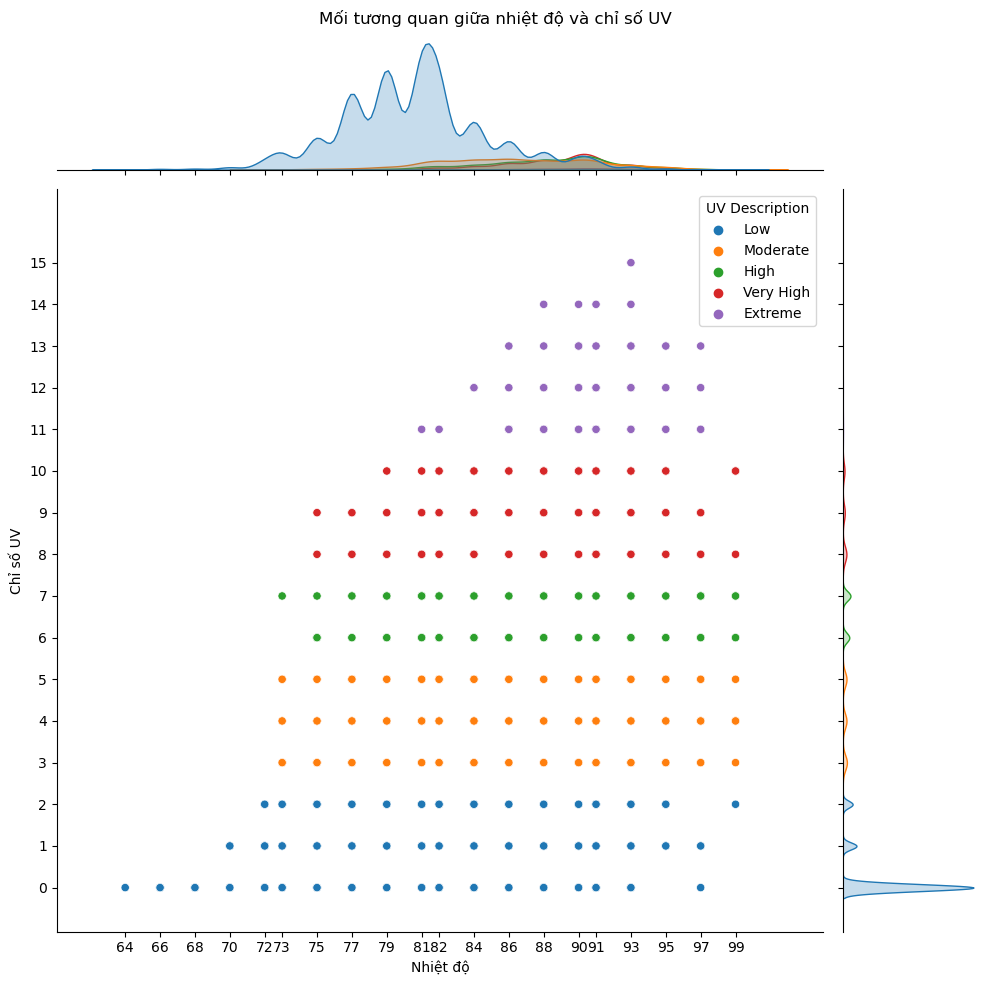

In [31]:
p = sns.jointplot(data=df, x='Temperature', y='UV Index', hue='UV Description', height=10)
p.fig.suptitle('Mối tương quan giữa nhiệt độ và chỉ số UV')
p.ax_joint.set_xlabel('Nhiệt độ')
p.ax_joint.set_ylabel('Chỉ số UV')
p.ax_joint.set_xticks(df['Temperature'].unique())
p.ax_joint.set_yticks(df['UV Index'].unique())
p.fig.tight_layout()

### 1.5 Nhận xét
- Mối tương quan chung giữa nhiệt độ và chỉ số UV là chỉ số UV càng tăng thì khoảng nhiệt độ càng thu hẹp và có xu hướng lệch về phía nhiệt độ cao.
- Các mức độ UV:
    - Thấp (Low):
        - Khoảng chỉ số UV từ 0 đến 2.
        - Khoảng nhiệt độ từ 64°F đến 99°F.
        - Chỉ số UV bằng 0 có khoảng nhiệt độ trải dài nhất và hơn hẳn các chỉ số còn lại.
    - Vừa (Moderate), Cao (High):
        - Khoảng chỉ số UV lần lượt từ 3 đến 5 và từ 6 đến 7.
        - Khoảng nhiệt độ từ 73°F đến 99°F.
    - Rất Cao (Very High):
        - Khoảng chỉ số UV lần lượt từ 8 đến 10.
        - Khoảng nhiệt độ từ 73°F đến 99°F.
    - Cực Độ (Extreme):
        - Khoảng chỉ số UV lần lượt từ 11 đến 15.
        - Khoảng nhiệt độ từ 81°F đến 97°F và thu hẹp đáng kể theo chiều tăng chỉ số UV.

## Câu hỏi 2

### 2.1 Nội dung câu hỏi
Nhiệt độ trung bình trong ngày theo từng tháng như thế nào?

### 2.2 Lợi ích khi trả lời câu hỏi
Giúp ta biết được trung bình nhiệt độ theo giờ trong ngày theo từng tháng. Từ đó, đưa ra kết luận về khoảng thời gian nóng hay lạnh trong ngày theo từng tháng.

### 2.3 Nguồn cảm hứng của câu hỏi
Từ Lab 3 môn Nhập môn Khoa học dữ liệu.

### 2.4 Phân tích dữ liệu để trả lời cho câu hỏi
Bước 1: Tạo dataframe là một ma trận 24x12 chứa trung bình nhiệt độ theo giờ trong ngày theo từng tháng.

In [32]:
df['Time'] = pd.to_datetime(df['Time'])

mean_temp_per_h_each_m = df[['Temperature', 'Time']].groupby([df['Time'].dt.hour, df['Time'].dt.month]).mean()

t = []
for i in range(1, 13):
    t.append(mean_temp_per_h_each_m[mean_temp_per_h_each_m.index.get_level_values(1) == i].values.flatten())

mean_temp_per_h_each_m = pd.DataFrame(np.flip(np.asarray(t).transpose(), 0))
mean_temp_per_h_each_m.columns = np.array(range(1, 13))
mean_temp_per_h_each_m

,1,2,3,4,5,6,7,8,9,10,11,12
0,77.145161,77.178571,81.209677,82.333333,82.677419,81.250000,80.590164,79.612903,78.866667,79.096774,79.716667,77.866667
1,78.193548,77.928571,81.725806,82.627119,83.016129,81.694915,80.983607,79.822581,78.916667,79.209677,80.450000,78.716667
2,78.741935,78.490909,82.241935,83.116667,83.540984,82.233333,81.241935,80.225806,79.433333,79.193548,81.000000,79.500000
3,79.564516,79.428571,82.967742,83.516667,84.065574,82.800000,81.688525,80.435484,80.083333,79.354839,81.576271,80.066667
4,80.459016,80.000000,84.145161,84.133333,84.700000,83.186441,82.000000,81.193548,80.366667,80.016129,82.355932,80.700000
5,81.548387,80.839286,85.596774,85.800000,85.786885,84.700000,83.096774,82.645161,80.950000,80.919355,82.966667,81.850000
6,83.612903,83.553571,88.209677,87.716667,86.606557,86.300000,84.387097,84.612903,82.450000,82.262295,84.216667,84.118644
7,86.161290,86.321429,90.774194,89.500000,87.854839,87.200000,86.048387,86.483871,84.216667,84.209677,85.933333,86.457627
8,88.048387,87.964286,92.951613,90.533333,89.245902,89.150000,87.564516,88.129032,85.666667,85.933333,86.983333,87.949153
9,88.145161,88.892857,93.716667,91.066667,89.790323,90.400000,87.967742,88.741935,86.250000,86.934426,87.933333,88.483333


Bước 2: Trực quan hóa dữ liệu bằng heatmap (seaborn) từ dataframe vừa tạo.

Text(50.722222222222214, 0.5, 'Giờ')

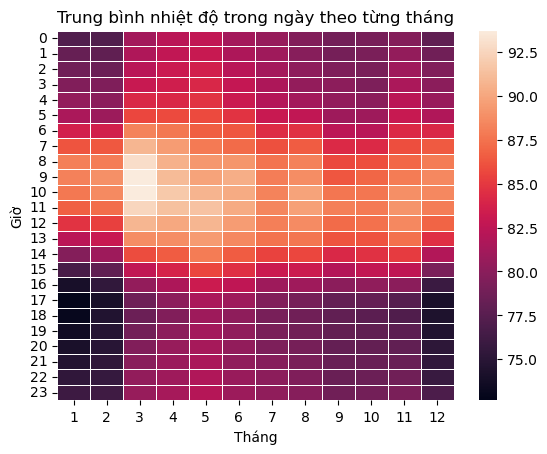

In [33]:
sns.heatmap(mean_temp_per_h_each_m, linewidth = 0.5)
plt.title('Trung bình nhiệt độ trong ngày theo từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Giờ')

### 2.5 Nhận xét
- Khoảng thời gian nóng trong ngày (trung bình từ 85°F) phình to từ tháng 3 đến tháng 8, cho thấy tại những tháng này thời gian nóng trong ngày là dài nhất. Đồng thời, cũng ở những tháng này, nhiệt độ trung bình trong ngày không dưới 80°F nên có thể kết luận đây là những tháng nóng trong năm.
- Khoảng thời gian nóng trong ngày co lại ở những tháng còn lại. Đặc biệt, các tháng 1, 2 và 12 có những thời điểm nhiệt độ trung bình trong ngày hạ xuống dưới 75°F, ta nhận định đây là những tháng lạnh trong năm.
- Nhiệt độ trung bình cao nhất năm rơi (trên 92,5°F) vào từ 9 đến 10 giờ ở tháng 3.
- Nhiệt độ trung bình thấp nhất năm rơi (dưới 75°F) vào từ 17 đến 19 giờ ở tháng 1.

## Câu hỏi 3

### 3.1 Nội dung câu hỏi
Sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm?

### 3.2 Lợi ích khi trả lời câu hỏi
Giúp ta biết được sự tương quan chung giữa 3 chỉ số thời tiết quan trọng: nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm.

### 3.3 Nguồn cảm hứng của câu hỏi
Nhóm tự nghĩ ra khi khám phá dữ liệu.

### 3.4 Phân tích dữ liệu để trả lời câu hỏi

Bước 1: Tính được nhiệt độ, điểm sương và độ ẩm trung bình mỗi tháng và lưu vào các biến `avg_temperature`, `avg_dew_point`, `avg_humidity`.
- Gom các giá trị lại theo từng tháng bằng `groupby` sau đó dùng `sum()` để tính tổng các giá trị.
- Đem giá trị vừa tính được chia cho số giá trị của từng tháng. Dùng `value_counts()` để đếm tổng số giá trị và dùng `sort_index()` để sắp xếp index lại theo đúng thứ tự của các tháng trong năm.
- Lưu các giá trị vừa tìm được vào các biến `avg_temperature`, `avg_dew_point`, `avg_humidity` tương ứng với nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm trung bình qua từng tháng.

In [34]:
#Nhiệt độ điểm sương trung bình mỗi tháng
avg_dew_point = df['Dew Point'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Độ ẩm trung bình mỗi tháng
avg_humidity = df['Humidity'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Nhiệt độ trung bình mỗi tháng
avg_temperature = df['Temperature'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()

Bước 2: Trực quan hóa sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm.
- Dùng bar chart để vẽ giá trị độ ẩm.
- Dùng line chart để thể hiện nhiệt độ không khí và điểm sương.

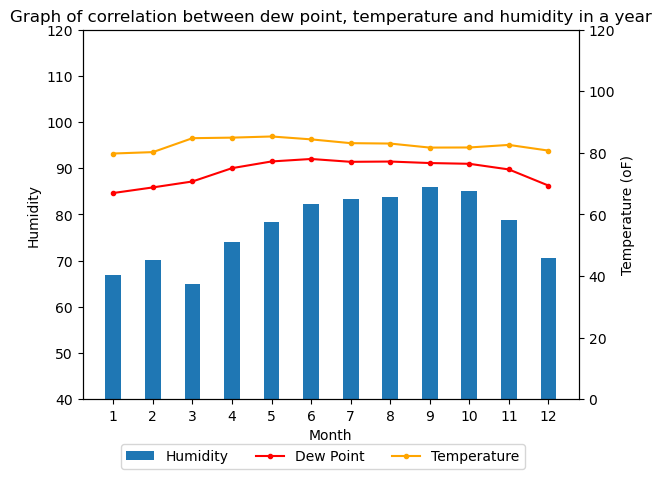

In [35]:
month_list = [i for i in range(1,13)] #cac thang trong nam
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.array(month_list), avg_humidity,label='Humidity',width=0.4)

ax1.set_ylabel('Humidity')
ax1.set_xlabel('Month')
ax1.set_ylim(40,120)
ax1.set_xticks((month_list))

ax2 = ax1.twinx()
ax2.plot(month_list, avg_dew_point,color='red', marker='.',label='Dew Point')
ax2.plot(month_list, avg_temperature,color='orange', marker='.',label='Temperature')

ax2.set_ylim(0,120)
plt.title('Graph of correlation between dew point, temperature and humidity in a year')
ax2.set_ylabel('Temperature (oF)')
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05));

### 3.5 Nhận xét
- Nhiệt độ phân bố tương đối đều giữa các tháng, độ chênh lệch giữa tháng có nhiệt độ cao nhất và tháng có nhiệt độ thấp nhất là rất thấp.
- Độ ẩm trong không khí cao, hầu hết các tháng đều có độ ẩm trung bình trên 70% (trừ tháng 1 và tháng 3).
- Nhiệt độ điểm sương gần như là tỉ lệ thuận với nhiệt độ không khí. Khi độ ẩm càng cao thì nhiệt độ điểm sương càng gần với nhiệt độ không khí.

## Câu hỏi 4

### 4.1 Nội dung câu hỏi

Các điều kiện thời tiết phân bố như thế nào trong năm?

### 4.2 Lợi ích khi trả lời câu hỏi

Giúp chúng ta nắm rõ được điều kiện thời tiết như thế nào trong năm để có thể có sự chuẩn bị trước cho thời tiết sắp tới. Đặc biệt là khách du lịch hoặc những người mới chuyển vào sinh sống ở đây.

### 4.3 Nguồn cảm hứng của câu hỏi

Trải nghiệm của bản thân trong năm đầu tiên vào học và sinh sống ở TPHCM.

### 4.4 Phân tích dữ liệu cho câu hỏi

Bước 1: Dùng `groupby` để gom nhóm các điều kiện thời tiết ở cột `Condition` theo từng tháng.

In [36]:
condition = df.groupby(df['Time'].dt.month)['Condition'].value_counts()

Bước 2: Lưu giá trị vào dictionary `dict_condition` với `key` là các điều kiện thời tiết, `value` là 1 dictionary khác với key là các tháng trong năm và value là số giờ xuất hiện điều kiện thời tiết đó trong tháng.

In [37]:
month_list = [i for i in range(1,13)] #cac thang trong nam
dict_condition = {}
for i in df['Condition'].unique():
    dict_condition[i] = {}
for i in df['Condition'].unique():
    for j in month_list:
        dict_condition[i][j] = 0
for i in condition.index:
    dict_condition[i[1]][i[0]] =  condition[(i[0],i[1])]/2

Bước 3: Trực quan hóa phân bố các điều kiện thời tiết.

Vẽ 1 biểu đồ trong đó có 6 biểu đồ con tương ứng với mỗi điều kiện thời tiết:
- Trục hoành là các tháng trong năm.
- Trục tung là số giờ.

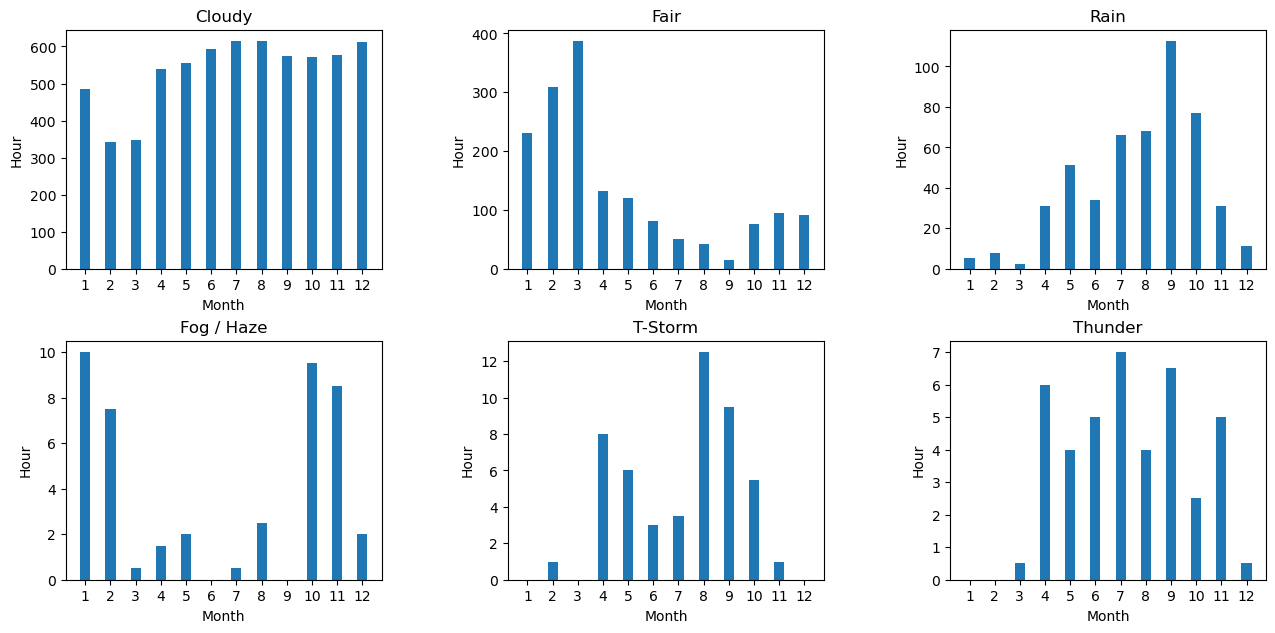

In [38]:
fig, axs = plt.subplots(2, 3,figsize=(15,5))

id = 0
for row in range(0,2):
    for col in range(0,3):
        title = df['Condition'].unique()[id]
        axs[row,col].bar(dict_condition[title].keys(), dict_condition[title].values(),width=0.4)
        axs[row,col].set_xticks((month_list))
        axs[row,col].set_title(title)
        axs[row,col].set_ylabel('Hour')
        axs[row,col].set_xlabel('Month')
        id +=1
plt.subplots_adjust(left=0.1,
                    bottom=-0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.3)

Vẽ biểu đồ cột thể hiện số giờ mà mỗi điều kiện thời tiết xảy ra trong năm.

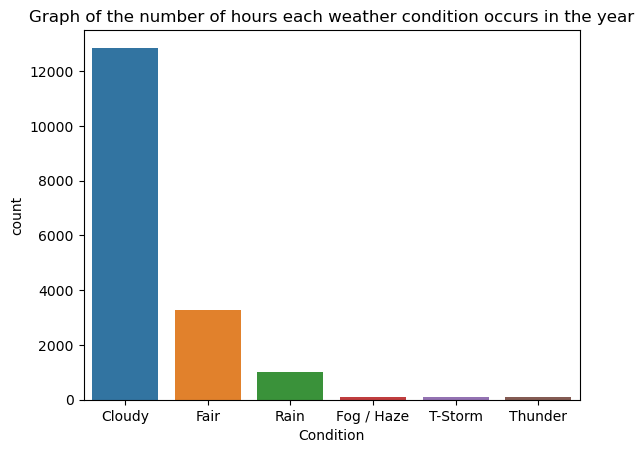

In [39]:
sns.countplot(x='Condition', data=df).set(title='Graph of the number of hours each weather condition occurs in the year');

### 4.5 Nhận xét:
- Tổng quát:
    - Điều kiện thời tiết Cloudy (có mấy), Fair (đẹp) và Rain (mưa)  chiếm phần lớn trong năm, đặc biệt là Cloudy với hơn 12000h.
    - Các kiểu thời tiết: Fog/Haze (sương mù), T-Storm (giông), và Thunder (sấm sét) xuất hiện ít trong năm với tháng cao nhất chỉ khoảng 13h/tháng.

- Cụ thể:
    - Cloudy:
        - Xuất hiện rất thường xuyên trong năm (trên 300h mỗi tháng), chỉ có tháng 1, 2 và 3 là dưới 500h mỗi tháng, còn lại đều trên 500h.
    - Fair:
        - Xuất hiện nhiều vào các tháng đầu năm (tháng 1,2,3) với hơn 200h mỗi tháng, cao điểm nhất là tháng 3 với gần 400h.
        - Các tháng còn lại trong năm thời gian xuất hiện ít, dưới 150h/tháng, chạm đáy là tháng 9 (vì lúc này là đỉnh điểm của mùa mưa).
    - Rain:
        - Mưa ít ở các tháng đầu năm và cuối năm (tháng 1,2,3,11,12) với thời gian mưa chỉ dưới 20h/tháng.
        - Mưa nhiều bắt đầu từ tháng 7 đến tháng 10 --> mùa mưa bắt đầu, đỉnh điểm là tháng 9 với gần 120h mưa.
    - Fog / Haze:
        - Sương mù nhiều vào các tháng đầu và cuối năm (tháng 1,2,10,11) với thời gian trên 6h/tháng.
        - Sương mù xảy ra ít vào các tháng giữa năm (từ tháng 3 đến tháng 9).
    - T-Storm:
        - Mưa giông xảy ra nhiều từ tháng 4 đến tháng 10, nhiều nhất vào tháng 8 và tháng 9, đặc biệt là tháng 8.
        --> Nguyên nhân: lúc đó là thời gian bước vào mùa mưa cho nên giông xuất hiện nhiều.
    - Thunder:
        - Sấm sét phân bố khá đều ở các tháng giữa và cuối năm (từ tháng 1 đến tháng 11).
        --> Nguyên nhân: Thông thường sấm sét thường đi kèm với mưa giông.
        - Xuất hiện ít vào 3 tháng đầu năm (tháng 1,2,3) và tháng 12.
        --> Nguyên nhân: vào 3 tháng đầu năm là mùa xuân, thời tiết đẹp nên ít xảy ra sấm sét. Tháng 12 ít sấm sét vì lúc đó đã bắt đầu kết thúc mùa mưa chuyển sang mùa nắng.

## Câu hỏi 5:
### 5.1 Nội dung câu hỏi
Điều thời tiết nhiều mây (Cloudy) phân bố như thế nào trong khoảng thời gian từ 6h đến 18h các ngày trong tuần?
### 5.2 Lợi ích khi trả lời câu hỏi
Giúp ta biết được những khoảng thời gian có thời tiết thuận lợi cho các hoạt động sinh hoạt ngoài trời trong mỗi ngày của cả tuần.
### 5.3 Nguồn cảm hứng của câu hỏi
Mong muốn không bị thời tiết làm ảnh hưởng đến buổi đi chơi với bạn bè.
### 5.4 Phân tích dữ liệu để trả lời cho câu hỏi
Bước 1: Tạo dataframe là một ma trận 12x7 biểu diễn số lần thời tiết là nhiều mây trong khoảng thời gian từ 6h đến 18h theo từng ngày.

In [40]:
def extractData_prob_5(df):
    df['Time'] = pd.to_datetime(df['Time'])

    cloudy_df = df[df['Condition'] == 'Cloudy']
    cloudy_df = cloudy_df[(cloudy_df['Time'].dt.hour >= 6) &
                            (cloudy_df['Time'].dt.hour < 18)]

    cloudy_df['Hour'] = cloudy_df['Time'].dt.hour
    cloudy_df['DayOfWeek'] = cloudy_df['Time'].dt.dayofweek
    cloudy_df = cloudy_df[['Hour', 'DayOfWeek']].groupby(['DayOfWeek', 'Hour']).size().array

    toArr = np.array(cloudy_df).reshape(7, 12)
    x = list(range(6, 18))
    y = ['Monday', 'Tuesday', 'Wednesday',
        'Thursday', 'Friday', 'Saturday', 'Sunday']
    return (toArr, x, y)

Bước 2: Trực quan hóa dữ liệu bằng heatmap (seaborn) từ dataframe vừa tạo.

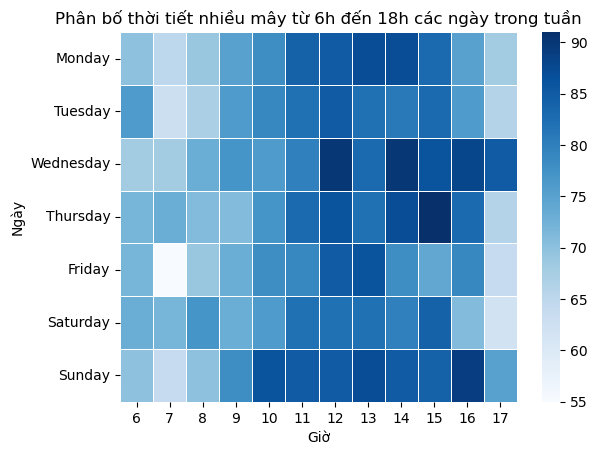

In [41]:
def drawChart_prob_5(df):
    arr, x, y = extractData_prob_5(df)
    sns.heatmap(data = arr, xticklabels=x, yticklabels=y, linewidth = 0.5, cmap="Blues")
    plt.title('Phân bố thời tiết nhiều mây từ 6h đến 18h các ngày trong tuần')
    plt.xlabel('Giờ')
    plt.ylabel('Ngày')

drawChart_prob_5(df)

### 5.5 Nhận xét
- Thời tiết có nhiều mây hơn từ 9h mỗi ngày và thích hợp để bắt đầu một buổi đi chơi.
- Thứ ba và thứ bảy ít xuất hiện thời tiết nhiều mây hơn.
- Thứ tư, thứ năm và chủ nhật có tần suất xuất hiện thời tiết nhiều mây cao, đặc biệt trong khoảng thời gian từ 14h đến 17 giờ.
- Thứ hai, thứ tư, thứ năm và chủ nhật có khoảng thời gian liên tục thời tiết nhiều mây dài, kéo dài từ 11h đến 16 giờ.
- Kết luận: Thời gian phù hợp cho các hoạt động ngoài trời là buổi trưa chiều (11h đến 17h) các ngày thứ hai, thứ tư, thứ năm và chủ nhật.

## Câu hỏi 6:
### 6.1 Nội dung câu hỏi
Những thời điểm nào chỉ số uv vượt ngưỡng cho phép?
### 6.2 Lợi ích khi trả lời câu hỏi
Giúp ta biết được những khoảng thời gian có chỉ số uv cao nguy hiểm với da người từ đó tránh tiếp xúc trực tiếp với ánh nắng.
### 6.3 Nguồn cảm hứng của câu hỏi
Mong muốn thời tiết không ảnh hưởng đến làn da cũng như sức khỏe chúng ta.
### 6.4 Phân tích dữ liệu để trả lời cho câu hỏi

In [42]:
df.index = pd.to_datetime(df['Time'],format='%Y-%m-%d %H:%M:%S')
data = df.groupby(by=[df.index.hour])["UV Index"].sum()

In [43]:
data = data.map(lambda x: x/730)

Trực quan hóa dữ liệu bằng bar chart.

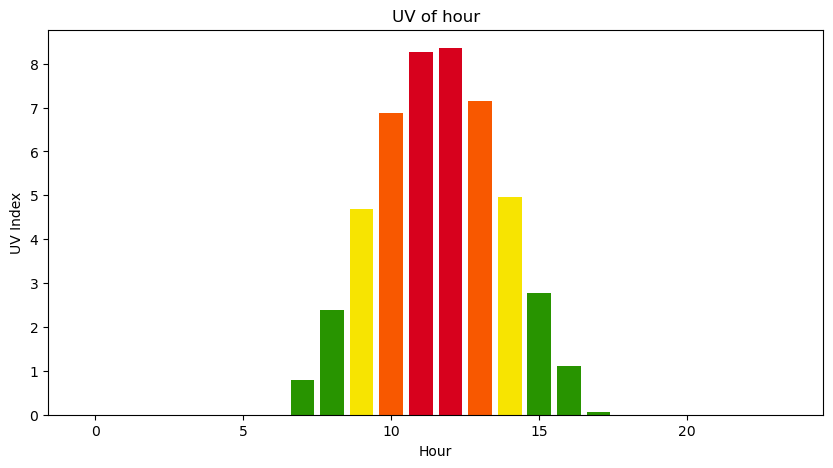

In [44]:
fig = plt.figure(figsize = (10, 5))
color = [] 
for i in data.values:
    if i < 3:
        color.append("#289400")
    elif i < 6:
        color.append("#f7e401")
    elif i < 8:
        color.append("#f85800")
    elif i < 10:
        color.append("#d7011d")
    else:
        color.append("#6c49c9")
        
# creating the bar plot
plt.bar(data.keys(), data.values, color=color, width = 0.8)


plt.xlabel("Hour")
plt.ylabel("UV Index")
plt.title("UV of hour")
plt.show()

### 6.5 Nhận xét:
- Thời tiết trở nên khắc nghiệt hơn trong lúc từ 9->14h.
- Vào khoảng 9 và 14 giờ chỉ số uv nằm ở mức nguy cơ gây hại trung bình.
- Vào khoảng 10 và 13 giờ chỉ số uv nằm ở mức nguy cơ gây hại cao.
- Vào khoảng 11 và 12 giờ chỉ số uv nằm ở mức nguy cơ gây hại nằm ở mức rất cao, gây hại đến cơ thể.
- Kết luận: Không nên ra ngoài vào khoảng thời gian 11h 12h nếu thật sự không cần thiết vì tia uv lúc này có nguy cơ gây hại rất cao, vào khoảng 10h 14h nếu cần ra ngoài thì phải có che chắn để đảm bảo an toàn cho cơ thể mình. 
    

# PHẦN 2: MÔ HÌNH HÓA DỮ LIỆU

Đọc dữ liệu từ tập tin `weather-2021-preprocessed.csv` và in ra 5 dòng đầu tiên.

In [ ]:
df = pd.read_csv('weather-2021-preprocessed.csv')
df.head()

# A. Mô hình hóa dữ liệu

## I. Giới thiệu bài toán
Dựa trên việc tìm hiểu về bộ dữ liệu thông qua các quá trình Khám phá dữ liệu và Đặt các câu hỏi có ý nghĩa cần trả lời, bài toán thích hợp cho bộ dữ liệu này là **'Dự đoán điều kiện thời tiết là nhiều mây hay không?'**.

Bài toán được chọn do bộ dữ liệu có các thuộc tính biểu thị chỉ số khí hậu (numerical columns) tương ứng với cột điều kiện thời tiết (categorical column). Tuy nhiên, ở cột điều kiện thời tiết, giá trị `Cloudy` chiếm nhiều hơn hẳn các giá trị còn lại, nên việc bài toán dự đoán là nhiều mây (`Cloudy`) hay không (các trường hợp còn lại) sẽ phù hợp và tránh trường hợp dữ liệu bị lệch (biased) gây ảnh hưởng đến hiệu suất của mô hình.

## II. Lựa chọn thuật toán máy học

Lý do lựa chọn thuật toán phân lớp (Classification Algorithm)
- Phân lớp (classification) là một tiến trình xử lý nhằm xếp các mẫu dữ liệu hay các đối tượng vào một trong các lớp đã được định nghĩa trước. Các mẫu dữ liệu hay các đối tượng được xếp về các lớp dựa vào giá trị của các thuộc tính (attributes) của mẫu dữ liệu hay đối tượng đó. Sau khi đã xếp tất cả các đối tượng đã biết trước vào các lớp tương ứng, lúc này mỗi lớp được đặc trưng bởi tập các thuộc tính của các đối tượng chứa trong lớp đó.
- Về bài toán "Dự đoán điều kiện thời tiết là nhiều mây hay không?", ở đây ta có 2 loại dữ liệu "có mây" và "không mây". Vì thế chọn Classification Algorithm là phù hợp nhất.

## III. Phân tích, lựa chọn những đặc trưng có mức độ liên quan cao, có tính quan trọng cho bài toán và tiền xử lý

Như đã trình bày ở Giới thiệu bài toán, ta tiến hành thay đổi tập giá trị ở cột `Condition`.

In [45]:
condition = {'Cloudy':'Cloudy',
             'Fair':'Not Cloudy',
             'Rain':'Not Cloudy',
             'Fog / Haze':'Not Cloudy',
             'T-Storm':'Not Cloudy',
             'Thunder':'Not Cloudy'}

df['Condition'] = df['Condition'].map(condition)
set(df['Condition'].to_list())

{'Cloudy', 'Not Cloudy'}

Từ quá trình đặt các câu hỏi có ý nghĩa cần trả lời, ta nhận thấy khác tháng trong năm có mối quan hệ nhất định với các biến thời tiết và điều kiện thời tiết, nên ở cột `Time` ta chỉ lấy tháng.

In [46]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.month
df

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
Time,,,,,,,,,,,,
2021-01-01 00:00:00,1,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Cloudy
2021-01-01 00:30:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Cloudy
2021-01-01 01:00:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Cloudy
2021-01-01 01:30:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
2021-01-01 02:00:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 21:30:00,12,81,82.0,82.0,64.0,58.0,6.0,8,29.94,Low,0,Cloudy
2021-12-30 22:00:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,Low,0,Cloudy
2021-12-30 22:30:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,Low,0,Cloudy


Từ quá trình đặt các câu hỏi có ý nghĩa cần trả lời, ta nhận thấy `UV Description` và `UV Index` có mức độ tương quan nhất định, chỉ số UV có thể biểu thị cho mức độ UV nên việc có cột `UV Description` trong quá trình này là không cần thiết.

In [47]:
df = df.drop('UV Description', axis=1)
df

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index,Condition
Time,,,,,,,,,,,
2021-01-01 00:00:00,1,75,75.0,75.0,61.0,61.0,6.0,8,29.85,0,Cloudy
2021-01-01 00:30:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.85,0,Cloudy
2021-01-01 01:00:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.82,0,Cloudy
2021-01-01 01:30:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,0,Cloudy
2021-01-01 02:00:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,0,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 21:30:00,12,81,82.0,82.0,64.0,58.0,6.0,8,29.94,0,Cloudy
2021-12-30 22:00:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,0,Cloudy
2021-12-30 22:30:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,0,Cloudy


Cột `Condition` là dạng categorical nên trước khi đưa vào mô hình, ta phải đưa về dạng numerical.

In [48]:
# Tạo Label Encoder
le = preprocessing.LabelEncoder()
# Chuyển các chuỗi label thành số
df['Condition'] = le.fit_transform(df['Condition'])
df

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index,Condition
Time,,,,,,,,,,,
2021-01-01 00:00:00,1,75,75.0,75.0,61.0,61.0,6.0,8,29.85,0,0
2021-01-01 00:30:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.85,0,0
2021-01-01 01:00:00,1,75,75.0,75.0,61.0,61.0,6.0,7,29.82,0,0
2021-01-01 01:30:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,0,0
2021-01-01 02:00:00,1,73,73.0,73.0,61.0,65.0,4.0,6,29.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 21:30:00,12,81,82.0,82.0,64.0,58.0,6.0,8,29.94,0,0
2021-12-30 22:00:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,0,0
2021-12-30 22:30:00,12,79,81.0,81.0,64.0,61.0,6.0,6,29.94,0,0


# B. Huấn luyện và đánh giá mô hình

Tách tập dữ liệu thành feature và label.

In [49]:
X = df[['Time', 'Temperature', 'Heat Index', 'Temperature Feels Like', 'Dew Point', 'Humidity', 'Wind Force', 'Wind Speed', 'Pressure', 'UV Index']]
y = df['Condition']

Tách tập dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set).

In [50]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

X_train = X.iloc[:13042]
X_test = X.iloc[13042:17390]
y_train = y[:13042]
y_test = y[13042:17390]

print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (13042, 10) (13042,)
Kích thước tập kiểm tra:  (4348, 10) (4348,)


Sau khi đã tách tập dữ liệu thành tập huấn luyện và tập kiểm tra, ta sẵn sàng tiến hành huấn luyện và đánh giá mô hình với hai mô hình phổ biến cho các phân lớp, đó chính là KNN và Naive Bayes.

## KNN Classification
KNN (K-nearest neighbor) là một trong những thuật toán supervised-learning đơn giản nhất (mà hiệu quả trong một vài trường hợp) trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training (đây cũng là lý do thuật toán này được xếp vào loại lazy learning), mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. K-nearest neighbor có thể áp dụng được vào cả hai loại của bài toán Supervised learning là Classification và Regression. KNN còn được gọi là một thuật toán Instance-based hay Memory-based learning.

### Huấn luyện mô hình

Kiểm tra độ chính xác của mô hình khi huấn luyện với các giá trị khác nhau của `n_neighbors` và sau đó chọn giá trị tốt nhất từ chúng.

In [51]:
# Tính độ chính xác của mô hình với các giá trị n_neighbors khác nhau
acc = np.zeros(20)
for i in range(1, 21):
    # Huấn luyện mô hình và dự đoán
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc[i-1] = metrics.accuracy_score(y_test, y_pred)

acc

array([0.66306348, 0.72838086, 0.68100276, 0.72447102, 0.7026219 ,
       0.73022079, 0.71343146, 0.73183073, 0.7125115 , 0.73735051,
       0.71366145, 0.72631095, 0.71136155, 0.72631095, 0.70952162,
       0.72884085, 0.71596136, 0.73137075, 0.72033119, 0.73114075])

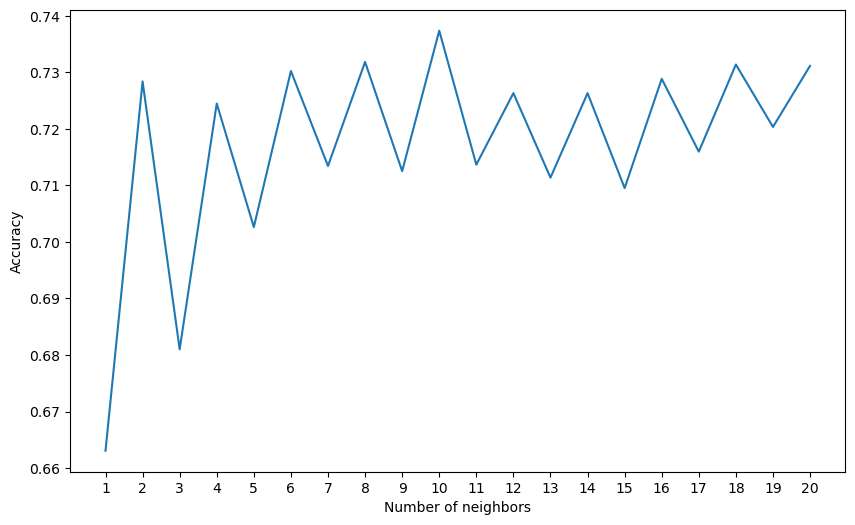

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 21), acc)
plt.xticks(np.arange(1, 21, step=1.0))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Biểu đồ cho ta thấy độ chính xác cao nhất với giá trị của n_neighbors là 10

### Xác thực siêu tham số của mô hình và báo cáo quá trình tinh chỉnh
Để tiến hành xác thực kỹ lưỡng các siêu tham số của mô hình, nhóm đã sử dụng kỹ thuật cross-validation. Vậy cross-validation là gì?
- Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm.
- Kỹ thuật này thường bao gồm các bước như sau:
    1. Xáo trộn dataset một cách ngẫu nhiên
    2. Chia dataset thành k nhóm
    3. Với mỗi nhóm:
        - Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
        - Các nhóm còn lại được sử dụng để huấn luyện mô hình
        - Huấn luyện mô hình
    4. Đánh giá và sau đó hủy mô hình
- Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

Tiến hành tinh chỉnh siêu tham số n_neighbors của mô hình KNN.

In [53]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

Khớp mô hình trên tập huấn luyện rồi tìm `best_score_` và lấy siêu tham số (`best_params_`) với `best_score_`

In [54]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [55]:
knn_cv.best_score_

0.617022012053604

In [56]:
knn_cv.best_params_

{'n_neighbors': 48}

Khớp mô hình sau khi đã tìm được siêu tham số tốt nhất

In [57]:
knn = KNeighborsClassifier(n_neighbors = 48)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=48)

Tiến hành dự đoán

In [58]:
y_pred = knn.predict(X_test)

#### Đánh giá mô hình

Confusion Matrix

In [59]:
confusion_matrix(y_test, y_pred)

array([[3109,  406],
       [ 742,   91]], dtype=int64)

Từ Confusion Matrix ở trên, ta có:
- TP = 3503
- FP = 12
- TN = 73
- FN = 760

Classification Report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3515
           1       0.18      0.11      0.14       833

    accuracy                           0.74      4348
   macro avg       0.50      0.50      0.49      4348
weighted avg       0.69      0.74      0.71      4348



In [61]:
scores = cross_val_score(knn, X, y, cv=5)
print('Độ chính xác của mô hình: ', np.mean(scores))

Độ chính xác của mô hình:  0.6272570442783209


## Naive Bayes Classification
- Naive Bayes là một thuật toán học có giám sát, dựa trên định lý Bayes và được sử dụng để giải các bài toán phân loại.
- Nó chủ yếu được sử dụng trong phân loại văn bản bao gồm tập dữ liệu huấn luyện chiều cao.
- Naive Bayes Classifier là một trong những thuật toán phân lớp đơn giản và hiệu quả nhất giúp xây dựng các mô hình máy học nhanh có thể đưa ra dự đoán nhanh.
- Nó là một bộ phân loại xác suất, có nghĩa là nó dự đoán trên cơ sở xác suất của một đối tượng.
- Một số ví dụ phổ biến về thuật toán Naive Bayes là lọc thư rác, phân tích tình cảm và phân loại bài viết.

### Huấn luyện mô hình

`GaussianNB()` không cần tham số nên ta tiến hành huấn luyện mô hình mà không cần kiểm tra độ chính xác đối với từng `n_neighbors` khác nhau như ở mô hình KNN.

In [62]:
nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7012419503219871

### Xác thực siêu tham số của mô hình và báo cáo quá trình tinh chỉnh
Tiếp tục sử dụng kỹ thuật cross-validation để xác thực kỹ lưỡng siêu tham số của mô hình.

In [63]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [64]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

Khớp mô hình trên tập huấn luyện rồi tìm `best_score_` và lấy siêu tham số (`best_params_`) với `best_score_`

In [65]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)

c:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [66]:
gs_NB.best_params_

{'var_smoothing': 0.12328467394420659}

In [67]:
gs_NB.best_score_

0.8115614459743662

In [68]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

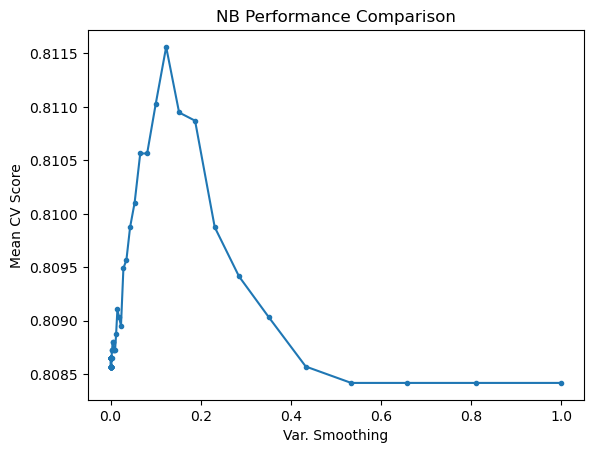

In [69]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [70]:
predict_test = gs_NB.predict(Data_transformed)

In [71]:
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('Độ chính xác của mô hình: ', accuracy_test)

Độ chính xác của mô hình:  0.8116375344986201


## So sánh kết quả của hai thuật toán học máy vừa thực hiện
- Thuật toán KNN hoạt động tốt trong các trường hợp dữ liệu độc lập có điều kiện hoặc có zero probability problem; ngoài ra, KNN cũng không yêu cầu bất kỳ quá trình training nào.
- Thuật toán Naive Bayes hoạt động tốt với các bộ dữ liệu lớn, nhiều đặc trưng và không bị ảnh hưởng bởi curse of dimensionality.
- Các kết quả thu được phía trên cho thấy độ chính xác đối với bộ dữ liệu này của Naive Bayes cao hơn KNN. Lý do là bộ dữ liệu lớn và có nhiều đặc trưng.